## Modele multimodalne

### Instalacja i import bibliotek

In [3]:
!pip install -q openai python-dotenv

In [4]:
import base64
from dotenv import load_dotenv

load_dotenv()


True

In [5]:
def encode_image(path):
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")


### Sterowanie pojazdem na podstawie obrazu

<img src="data/img/self_driving.gif" width="1200">

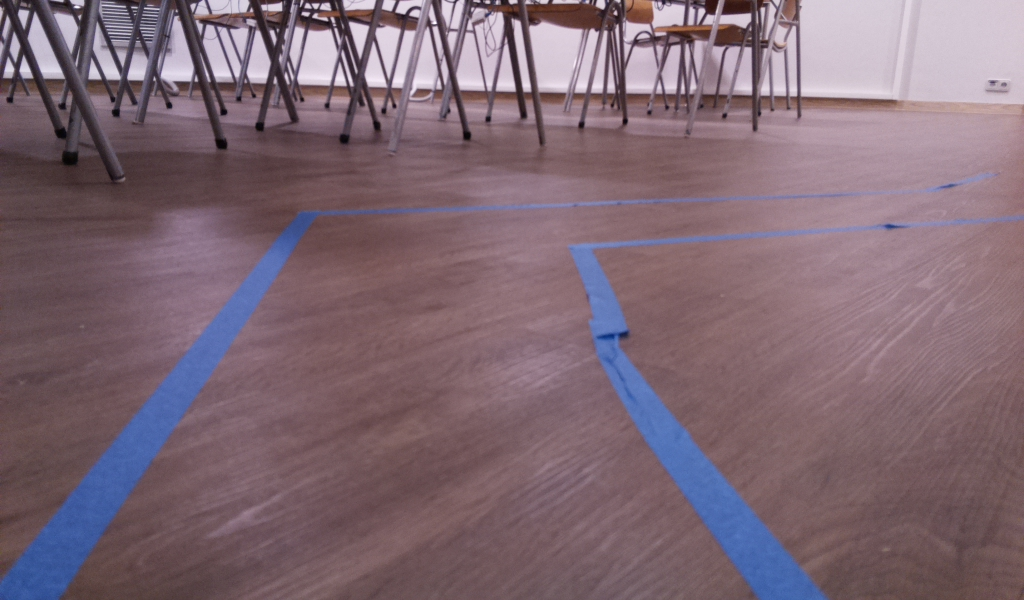

In [6]:
from IPython.display import Image
Image(filename="../../data/img/lane_navigation_1.png")

In [7]:
from openai import OpenAI
client = OpenAI()

image_b64 = encode_image("../../data/img/lane_navigation_1.png")
print(image_b64)

iVBORw0KGgoAAAANSUhEUgAABAAAAAJYCAYAAAD8EJQjAACAAElEQVR4XnS9ZXAcy7bveb7Pffecs7cZJYux1dwttaQWMzMzS5YssizLIFtmZmbaZpaZZItZlizL7L0P3PfevImJOzETMRMx8Z+1srvk3vvM+7Ciqquysigrc/3+uTL7T0kRYQg3+kJm5wbXJS5wWOwMu4WOcLR2gtxZAaWbHlq5NxTOWhgU3ihPL8H6ulVYWdGAjJgEpMfG0fF+MMj1UNh7wM3GFcGGIKjoWMdF9nBYZAPb+VawmW0tzGGhndjubOWEJXOs4LzYAQ4LlsBxoQ1kts7wsHeH3EEGf50fogNjkBSejrTYAmQlVSE/sxErlm3BiuqtWFa4DmmRxfDXhyPQEILUqCzUljRh/fJd2Nl2HGeP3sbtK0/x+G4nOp7049Wzfrx+MYju12Nko+h+NYzDu48hMTwBencVPBycIbN3gbcqCFmJZXhw8w16O8Yx0DmJwa53GOqexHDPewz1TWG4/wMG+9+jv9e0fajnHfq6xvHqeS9K8ysR6BsMtYuKnqezMH62/OxCfcKQmZiHmtLlqC9tQU1JC6oKl6M4uw7ZyVV0j+VYWbseBekVSA0vRJx/DmL9MxDtn45ovwyEeCdD7xEAb3UgDKoAaNy96DmroXbT0fvRw91RBSdrdzgtdoTTIlvYzl0Iu3lLYD/fGktmzSObg4V/mY2FP83BnP9lBub9lxmY++8/YeHPM2A/bx6cF1lB5+QOf7kW8T5GpPgFIMHHe9pCVWpEefogSOMNpZMC7k4e8HCRQ6dQIVijQYy3F+03IMbgg2itN+J0BkRpPRGp1SBMpUSo0gOxOg2iKW20zgsRlE8kvecoYzjyUsuQTfcdH5uN/JxapCdXw+gVDy9FAPQyHfSuGvipvBCk1tG5tAjR6uCxZAlk1tZwsV4CD1t38cwNCkrjFYy4oDSkROTQc4uH0kEJhaMc3koDvKic6tw1dP0q

In [8]:
resp = client.responses.create(
    model="gpt-4o-mini",
    input=[{
        "role": "user",
        "content": [
            {"type": "input_text",
             "text": ("This is image from front camera of autonomous vehicle prototype that drives through lane."
                      "Tell me if next step of a car should be moving forward, turn left or turn right? "
                      "Return only single word: forward, left, or right. Car moves only 30cm in each step")},
            {"type": "input_image",
             "image_url": f"data:image/jpeg;base64,{image_b64}"}
        ],
    }],
)

decision = resp.output_text.strip().lower()

print("Model decision:", decision)


Model decision: left


### Zliczanie osób na zdjęciu

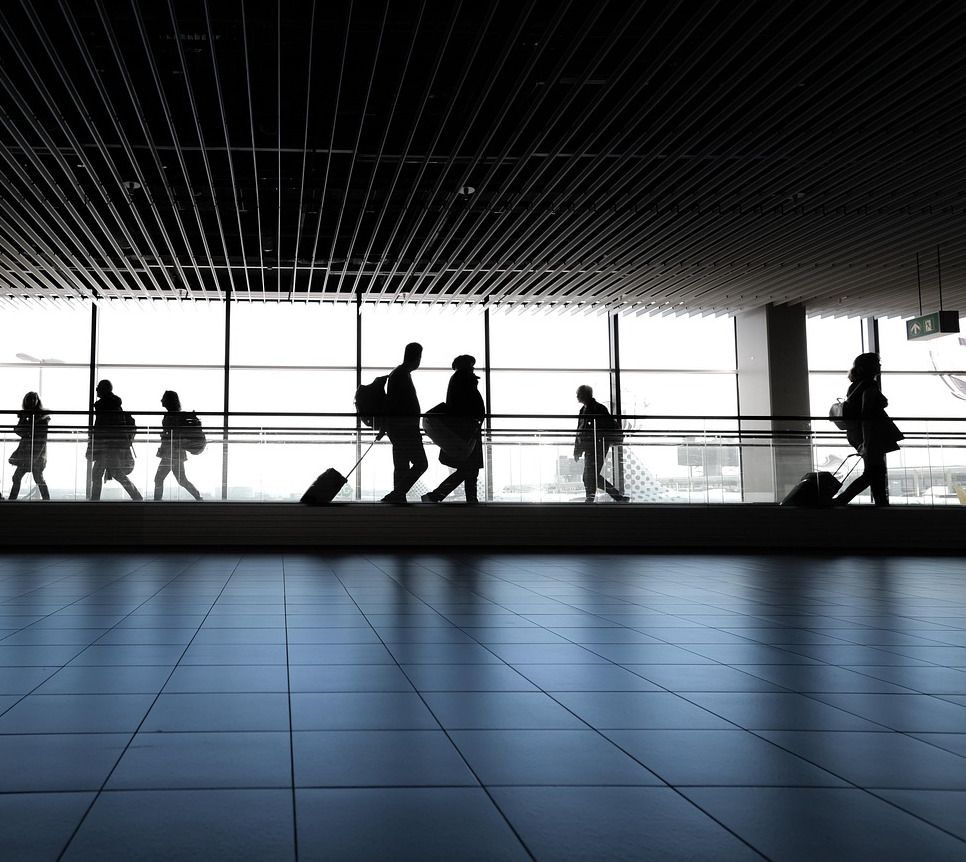

In [9]:
from IPython.display import Image
Image(filename="../../data/img/airport_simple.jpg")

In [10]:
image_b64 = encode_image("../../data/img/airport_simple.jpg")

messages = [{
        "role": "user",
        "content": [
            {"type": "input_text", "text": "Count people on image. Return only the number. Count also people hidden behind other people or visible only partially on the image. Give precise number."},
            {"type": "input_image", "image_url": f"data:image/jpeg;base64,{image_b64}"},
        ],
    }]

response = client.responses.create(model="gpt-4o-mini", input=messages)
print("Number of people:",  response.output_text)


Number of people: There are 8 people in the image.
